<a href="https://colab.research.google.com/github/Wahananta/code-python/blob/main/contrast_stretching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

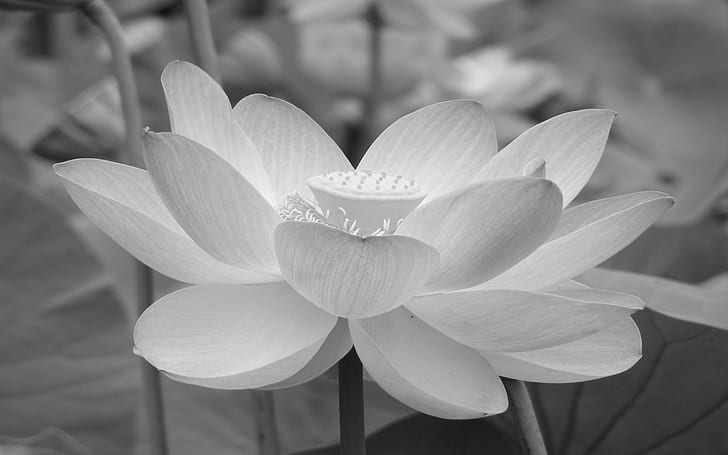

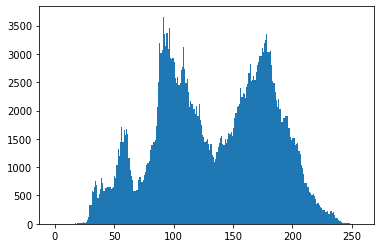

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

img = cv2.imread('bunga_merah.jpg')
grayImg = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY);

# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(grayImg, r1, s1, r2, s2)
  
# Save edited image.
# cv2.imwrite('contrast_stretch.jpg', contrast_stretched)

cv2_imshow(grayImg)

plt.hist(grayImg.ravel(),256,[0,256])
plt.show()

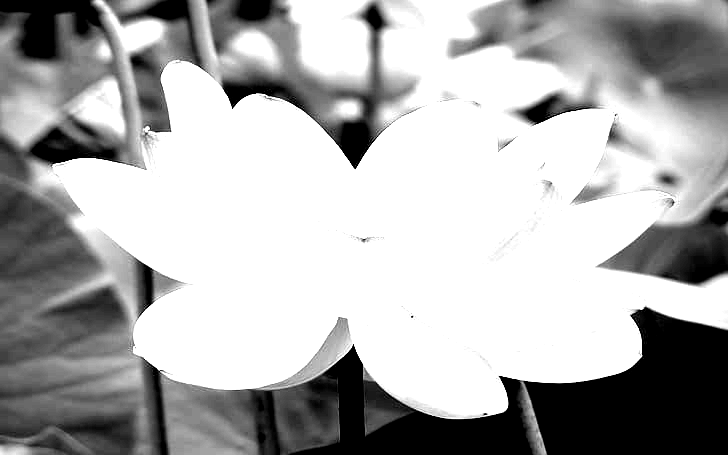

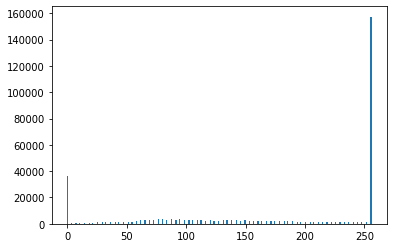

In [ ]:
cv2_imshow(contrast_stretched)

plt.hist(contrast_stretched.ravel(),256,[0,256])
plt.show()

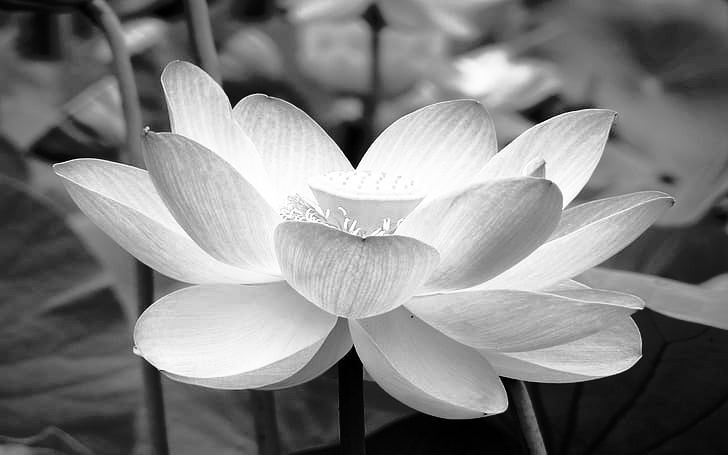

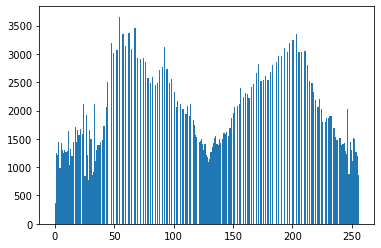

In [ ]:
equ = cv2.equalizeHist(grayImg)

cv2_imshow(equ)

plt.hist(equ.ravel(),256,[0,256])
plt.show()